In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

In [2]:
df = Database()
df = df[np.isfinite(df['FP Exp.'])]

In [36]:
train, test = train_test_split(df, test_size=0.1)

intercept 209.47002939884422 
 coef [ 7.65050471e+00 -7.65229872e+00 -6.20319804e+00 -1.17590457e+01
 -1.36969845e+01  1.72673101e+00 -8.43366188e+00 -1.01916087e+01
 -3.33066907e-14  1.42454080e+01  1.73063187e+00  8.82500372e+00
  1.12682441e+01  1.20298264e+01  2.19786210e+01  6.70943655e+00
  8.01656295e+00  5.30436060e+01 -1.38295056e+00  1.81151879e+01
  2.69786688e+01  2.56416618e+01  5.00552170e+01  2.69786688e+01
  3.62942214e+01  0.00000000e+00 -1.81790335e+01  0.00000000e+00]
Train r^2 0.8506513916138508
Test r^2 0.8685042353886101
Train error 478.6105580431137
Test error 355.0993808181199


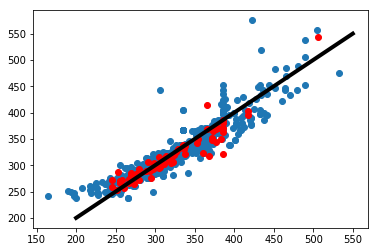

In [37]:
### Ordinary Least Squares
reg = linear_model.LinearRegression()
train_X = train.loc[: , '-H': 'aaCa']
test_X = test.loc[: , '-H': 'aaCa']
reg.fit(train_X, train['FP Exp.'])
print('intercept', reg.intercept_, '\n', 'coef', reg.coef_)
train_predict = reg.predict(train_X)
test_predict = reg.predict(test_X)
plt.scatter(train['FP Exp.'], train_predict)
plt.scatter(test['FP Exp.'], test_predict, color='r')
plt.plot([200, 550], [200, 550], lw=4, color='black')

print("Train r^2", r2_score(train['FP Exp.'], train_predict))
print("Test r^2", r2_score(test['FP Exp.'], test_predict))
print("Train error", mean_squared_error(train['FP Exp.'], train_predict))
print("Test error", mean_squared_error(test['FP Exp.'], test_predict))

In [ ]:
###OLS

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
%matplotlib inline

/Users/cheng/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
train.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
538,methyl octanoate,Esters,342.15,33.6,18,2,6,0,0,0,...,0,1,0,0,1,0,0,0,1,0
784,"2,3-dimethylpent-1-ene",Olefins,256.00,NaN,14,3,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
942,"2,2,3,4-tetramethylpentane",Paraffins,284.00,NaN,20,6,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1001,"3-ethyl-2,3-dimethylpentane",Paraffins,288.00,NaN,20,5,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
427,"ethyl buta-2,3-dienoate",Esters,320.15,NaN,8,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [39]:
y = train['FP Exp.']
x = train.loc[: , '-H': 'aaCa']
x = sm.add_constant(x)

In [40]:
mlr = sm.OLS(y, x).fit()  ###build linear regression model using StatsModels

In [41]:
mlr.summary()

/Users/cheng/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/cheng/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/cheng/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/cheng/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FP Exp.   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          3.59e-208
Time:                        23:49:19   Log-Likelihood:                -2554.0
No. Observations:                 567   AIC:                             5154.
Df Residuals:                     544   BIC:                             5254.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           209.4700     11.482     18.244      0.000     186.916     232.024
-H                7.6505      1.397      5.478      0.000       4.907      10.394
-CH3             -7.6523      1.778     -4.303      0.000     -11.146      -4.159
-CH2-            -6.2032      2.794     -2.220      0.027     -11.691      -0.715
>CH-            -11.7590      7.201     -1.633      0.103     -25.905       2.387
>C<             -13.6970     11.658     -1.175      0.241     -36.598       9.204
=CH2              1.7267      3.620      0.477      0.634      -5.384       8.837
=CH-             -8.4337      1.659     -5.085      0.000     -11.692      -5.175
=C<             -10.1916      7.005     -1.455      0.146     -23.951       3.568
#CH           -2.274e-14   3.07e-14     -0.740      0.460   -8.31e-14    3.77e-14
#C-              14.2454     22.649      0.629      0.530     -30.244      58.735
(-CH2-)R          1.7306      1.692      1.023      0.307      -1.592       5.053
(>CH-)R           8.8250      4.582      1.926      0.055      -0.175      17.825
(>C<)R           11.2682     10.711      1.052      0.293      -9.772      32.309
(=CH-)R          12.0298      2.449      4.912      0.000       7.219      16.840
(=C<)R           21.9786      7.652      2.872      0.004       6.948      37.009
aCHa              6.7094      0.866      7.745      0.000       5.008       8.411
saCa              8.0166      4.179      1.918      0.056      -0.193      16.226
-OH (alcohol)    53.0436      4.485     11.826      0.000      44.233      61.854
-OH (phenol)     -1.3830      2.344     -0.590      0.555      -5.987       3.221
-O-              18.1152      7.974      2.272      0.023       2.452      33.778
(-O-)R           26.9787      6.837      3.946      0.000      13.549      40.408
aOa              25.6417     22.764      1.126      0.260     -19.075      70.359
>C=O             50.0552     23.740      2.109      0.035       3.423      96.688
(>C=O)R          26.9787      6.837      3.946      0.000      13.549      40.408
-CHO             36.2942      9.192      3.949      0.000      18.239      54.350
-COOH                  0          0        nan        nan           0           0
-COO-           -18.1790     15.198     -1.196      0.232     -48.033      11.675
aaCa                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                      185.968   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.852
Skew:                          -1.238   Prob(JB):                    5.22e-301
Kurtosis:                      10.239   Cond. No.                     1.12e+16
================================================================

####According to the result, we can see the F factor is large, which shows relation between Flash point and functional groups. According to t-test, #C- and -OH (phenol) is not good descriptors, so we decide to remove them.

In [42]:
x_test = test.loc[: , '-H': 'aaCa']
x_test = sm.add_constant(x_test)
fp_pre = mlr.predict(x_test)

In [43]:
mean_squared_error(test['FP Exp.'], fp_pre)

355.09938081813334

In [46]:
### Partial Least Squares (PLS)
r_2_train = []
r_2_test = []
mse_train = []
mse_test = []
for i in np.arange(1, len(train_X.columns)+1):
    pls = PLSRegression(n_components=i)
    pls.fit(train_X, train['FP Exp.'])
    train_predict = pls.predict(train_X)
    test_predict = pls.predict(test_X)
    r_2_train.append(r2_score(train['FP Exp.'], train_predict))
    r_2_test.append(r2_score(test['FP Exp.'], test_predict))
    mse_train.append(mean_squared_error(train['FP Exp.'], train_predict))
    mse_test.append(mean_squared_error(test['FP Exp.'], test_predict))

/Users/cheng/miniconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:313: UserWarning: X scores are null at iteration 22
  warnings.warn('X scores are null at iteration %s' % k)


Text(0.5,1,'error vs n_components')

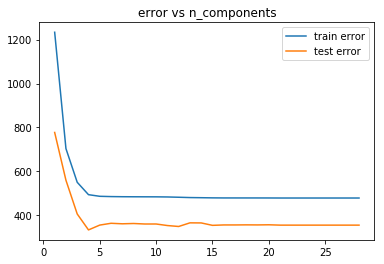

In [48]:
#result = pd.DataFrame([r_2_train, r_2_test, mse_train, mse_test], index=['r_2_train', 'r_2_test', 'mse_train', 'mse_test'], 
#                      columns=np.arange(1, 29))
#result

x = np.arange(1, len(train_X.columns)+1)
plt.plot(x, mse_train, label='train error')
plt.plot(x, mse_test, label='test error')
plt.legend(loc=1)
plt.title('error vs n_components')


In [100]:
#Ridge Regression
train1 = train.loc[ : , 'FP Exp.':]
test1 = test.loc[ : , 'FP Exp.':]
train_normalized = train1 / train1.std()
test_normalized = test1 / test1.std()
train_normalized = train_normalized.dropna(axis=1, how='all')
test_normalized = test_normalized.dropna(axis=1, how='all')

In [101]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6 ,6, 200)
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(train_normalized.loc[ : , '-H':], train_normalized['FP Exp.'])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized['FP Exp.'], model.predict(
        train_normalized.loc[ : , '-H':])))
    testerror.append(mean_squared_error(test_normalized['FP Exp.'], model.predict(
        test_normalized.loc[ : , '-H':])))

ValueError: shapes (64,22) and (25,) not aligned: 22 (dim 1) != 25 (dim 0)